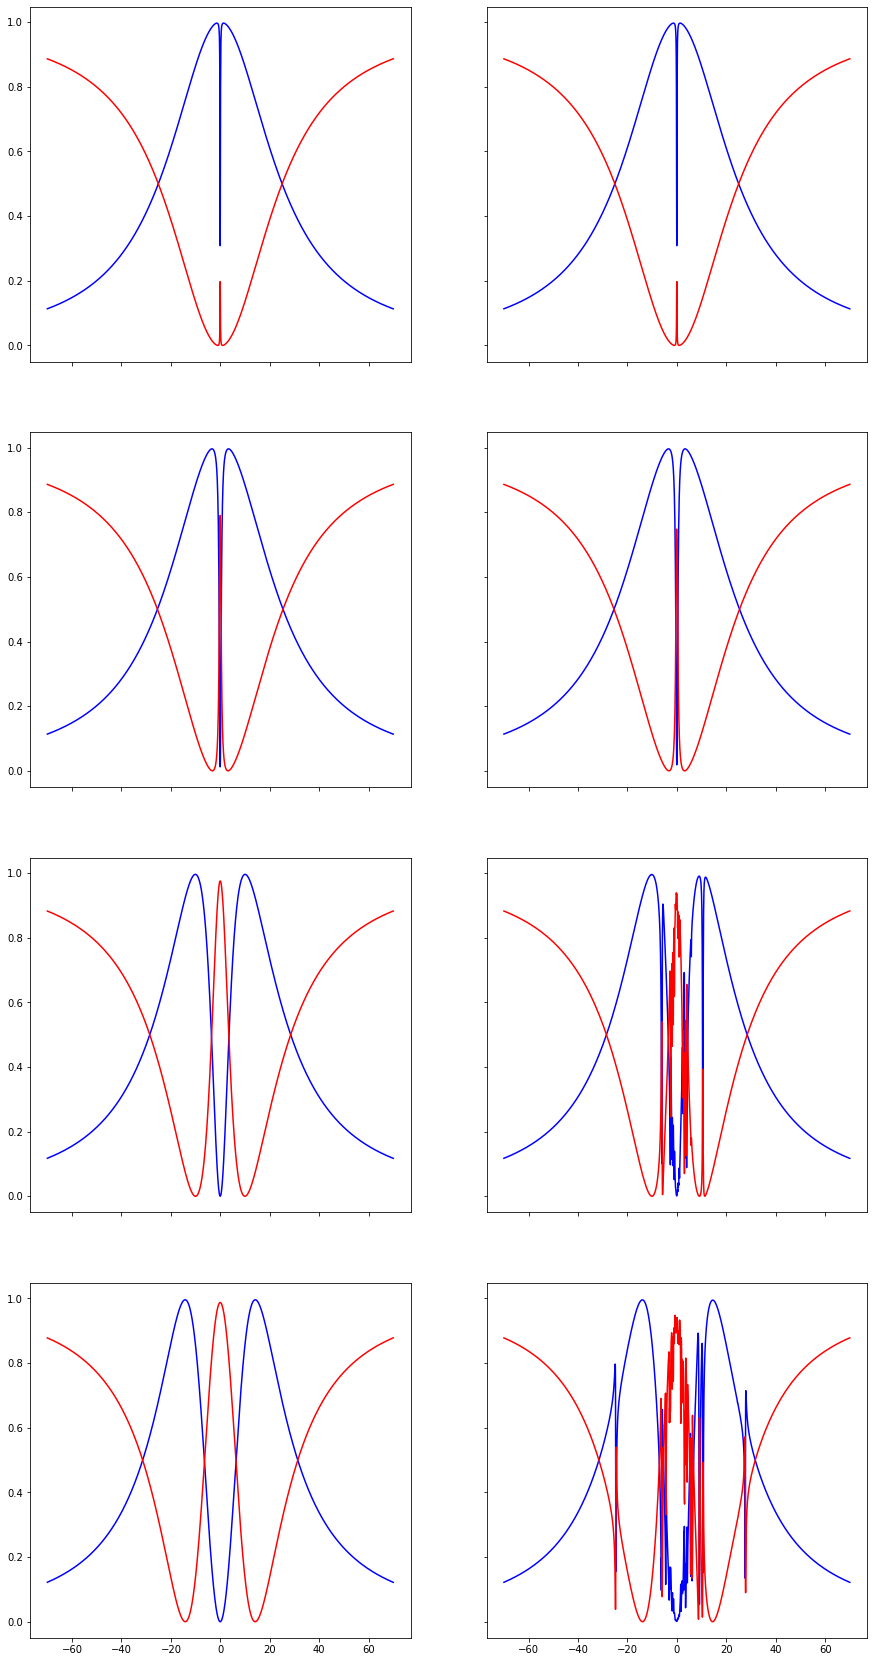

In [3]:
import numpy as np
import torch
from calcD import calc_D
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt

u = 1.96*3.33e-30;  #2 Debye into SI units
lmbda = 2.9e-6;    #2.9 um wavelength
c = 3e8;            #speed of light
w = 2*np.pi*c/lmbda;  #get angular frequency
hb = 1.054e-34;     #hbar
eo = 8.854e-12;     #permittivity of free space
er = 11.7;          #relative permittivity of silicon
refractive_index = np.sqrt(er);       #get refractive index of Si

g = 0.1
x = np.random.normal(0, 10e-9, 200)
y = np.random.normal(0, 10e-9, 200)
z = np.random.normal(0, 10e-9, 200)
We = np.random.normal(0, g*117, 200)

d, costheta, lw_overlap = calc_D(x, y, z, We, g)

# print(d)
# print(costheta)
# print(np.sort(lw_overlap))

val1 = u**2/(4*np.pi*eo)
val2 = (1-3*np.power(costheta,2))*6.2e18*1e6
J1 = 0*np.divide(val1, np.power(d,3))*val2
J2 = lw_overlap*np.divide(val1, np.power(d,3))*val2
J3 = np.divide(val1, np.power(d,3))*val2

J = np.array(([np.transpose(J1), np.transpose(J2)]))
# print(J)
# print(J[1,:])

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -70
plot_params['lim2'] = 70
plot_params['wnum'] = 2000
plot_params['time_val'] = 0

sim_params['k']  = 50    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['g'] = 1 # rabi frequency
sim_params['gamma']  = g # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['We'] = np.random.normal(0, 0, 200)

fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(30, 15))

n_list = [1,10,100,200]
for i in range(len(n_list)):
    for j in range(0,2):
        sim_params['N']  = n_list[i]
        # print(int((n_list[i]-1)*n_list[i]/2))
        sim_params['jvec'] = J[j,0:int((n_list[i]-1)*n_list[i]/2)]
        pt1 = PhotonTransmission(plot_params, sim_params)
        x, y1, y2 = pt1.calc_first_subspace()
        axs[i][j].plot(np.transpose(x), y1, 'b')
        # axs[i][j].plot(x, y2, 'r')